In [10]:
import pandas as pd
import json
import matplotlib.mlab as mlab
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles
%matplotlib inline
def store_json(address, dic):
    with open(address, 'w') as fp:
        json.dump(dic, fp)


def load_json(address):
    with open(address, 'r') as f:
        return json.load(f)

In [11]:
_table = pd.read_csv(r'/Users/apple/Desktop/BNFO286/gene_level_summary_stats_pmid_25056061.txt', sep='\t')
gene_p_value_list = dict(zip(_table.Gene, -np.log(_table['TopSNP P-Value'])))
_bip_name = gene_p_value_list.keys()

In [12]:
with open(r'/Users/apple/Desktop/BNFO286/Parsimonious Composite Network (PCNet).cx', 'r') as f:
    tmp = json.load(f)


In [4]:
raw_nodes = tmp[7]['nodes']
raw_edges = tmp[8]['edges']
print("nodes count", len(raw_nodes))

nodes count 19781


In [5]:
# raw_nodes
p_list = []
network_gane_name_list = []
import numpy as np
for i in raw_nodes:
    if i['n'] not in gene_p_value_list.keys():
        p_list.append(-np.log(1))
        network_gane_name_list.append(i['n'])
    else:
        p_list.append(-np.log(gene_p_value_list[i['n']]))
        network_gane_name_list.append(i['n'])

In [6]:
source_list = []
target_list =[]
for i in raw_edges:
    source_list.append(i['s'])
    source_list.append(i['t'])
    target_list.append(i['t'])
    target_list.append(i['s'])

In [7]:
print(source_list[:10])
print(target_list[:10])

[0, 1, 0, 2, 0, 6239, 0, 7486, 0, 6851]
[1, 0, 2, 0, 6239, 0, 7486, 0, 6851, 0]


In [8]:
store_json(r'/Users/apple/Desktop/BNFO286/preprocessed_data.json',[p_list,source_list,target_list])

# overlap between two data

14861
14966


/Users/apple/anaconda3/lib/python3.5/site-packages/matplotlib_venn/_venn3.py:61: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


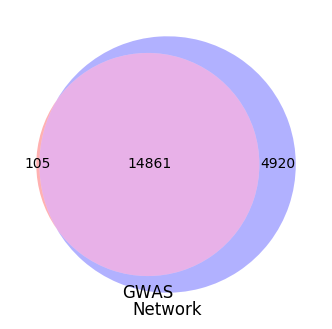

In [13]:
print(len(np.intersect1d(_table.Gene, network_gane_name_list)))
aa = _table[~_table.Gene.isin(network_gane_name_list)].Gene.tolist()
print(len(_table.Gene))
# _table[~_table.Gene.isin(network_gane_name_list)]
venn3([set(_table.Gene), set(network_gane_name_list),set()], ['GWAS', 'Network',''],set_colors=('r', 'b', 'g'),alpha=0.3)

## load benchmark

In [14]:
gene_set = {"attribute":{"name":"schizophrenia","href":"/api/1.0/attribute/schizophrenia"},"dataset":{"name":"CTD Gene-Disease Associations","href":"/api/1.0/dataset/CTD+Gene-Disease+Associations"},"associations":[{"gene":{"symbol":"LRRN1","href":"/api/1.0/gene/LRRN1"},"thresholdValue":1.0,"standardizedValue":1.0561},{"gene":{"symbol":"ATP6V1B2","href":"/api/1.0/gene/ATP6V1B2"},"thresholdValue":1.0,"standardizedValue":1.0241},{"gene":{"symbol":"PLCB1","href":"/api/1.0/gene/PLCB1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"HTR6","href":"/api/1.0/gene/HTR6"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CAMK2B","href":"/api/1.0/gene/CAMK2B"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CCDC108","href":"/api/1.0/gene/CCDC108"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"ZNF530","href":"/api/1.0/gene/ZNF530"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"TAAR6","href":"/api/1.0/gene/TAAR6"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NRG3","href":"/api/1.0/gene/NRG3"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"MBP","href":"/api/1.0/gene/MBP"},"thresholdValue":1.0,"standardizedValue":1.16137},{"gene":{"symbol":"HCAR2","href":"/api/1.0/gene/HCAR2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"AHI1","href":"/api/1.0/gene/AHI1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CYP1A2","href":"/api/1.0/gene/CYP1A2"},"thresholdValue":1.0,"standardizedValue":1.09857},{"gene":{"symbol":"NUPR1","href":"/api/1.0/gene/NUPR1"},"thresholdValue":1.0,"standardizedValue":1.57641},{"gene":{"symbol":"ESAM","href":"/api/1.0/gene/ESAM"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"ZNF480","href":"/api/1.0/gene/ZNF480"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"LGR4","href":"/api/1.0/gene/LGR4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GPR153","href":"/api/1.0/gene/GPR153"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"TAGLN","href":"/api/1.0/gene/TAGLN"},"thresholdValue":1.0,"standardizedValue":1.35647},{"gene":{"symbol":"WDR11","href":"/api/1.0/gene/WDR11"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CYP2D6","href":"/api/1.0/gene/CYP2D6"},"thresholdValue":1.0,"standardizedValue":1.96935},{"gene":{"symbol":"FAM3D","href":"/api/1.0/gene/FAM3D"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"HTR1A","href":"/api/1.0/gene/HTR1A"},"thresholdValue":1.0,"standardizedValue":1.71606},{"gene":{"symbol":"CHI3L1","href":"/api/1.0/gene/CHI3L1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PGBD1","href":"/api/1.0/gene/PGBD1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"TP53","href":"/api/1.0/gene/TP53"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"KCNH2","href":"/api/1.0/gene/KCNH2"},"thresholdValue":1.0,"standardizedValue":1.87742},{"gene":{"symbol":"AVP","href":"/api/1.0/gene/AVP"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"COMT","href":"/api/1.0/gene/COMT"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PML","href":"/api/1.0/gene/PML"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"APOL4","href":"/api/1.0/gene/APOL4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"KPNA1","href":"/api/1.0/gene/KPNA1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"DTNBP1","href":"/api/1.0/gene/DTNBP1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SCZD6","href":"/api/1.0/gene/SCZD6"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"DRD4","href":"/api/1.0/gene/DRD4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"BTG1","href":"/api/1.0/gene/BTG1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PIK3CB","href":"/api/1.0/gene/PIK3CB"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"FASTKD5","href":"/api/1.0/gene/FASTKD5"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NKAPL","href":"/api/1.0/gene/NKAPL"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"LDLR","href":"/api/1.0/gene/LDLR"},"thresholdValue":1.0,"standardizedValue":1.13484},{"gene":{"symbol":"SCZD3","href":"/api/1.0/gene/SCZD3"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SREBF2","href":"/api/1.0/gene/SREBF2"},"thresholdValue":1.0,"standardizedValue":1.11775},{"gene":{"symbol":"ZKSCAN4","href":"/api/1.0/gene/ZKSCAN4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SP4","href":"/api/1.0/gene/SP4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"KDR","href":"/api/1.0/gene/KDR"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NPRL2","href":"/api/1.0/gene/NPRL2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SLC6A3","href":"/api/1.0/gene/SLC6A3"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PAK2","href":"/api/1.0/gene/PAK2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"FGFR1","href":"/api/1.0/gene/FGFR1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PRODH","href":"/api/1.0/gene/PRODH"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SYN2","href":"/api/1.0/gene/SYN2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NGFR","href":"/api/1.0/gene/NGFR"},"thresholdValue":1.0,"standardizedValue":1.04868},{"gene":{"symbol":"VPS39","href":"/api/1.0/gene/VPS39"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CASP3","href":"/api/1.0/gene/CASP3"},"thresholdValue":1.0,"standardizedValue":1.20719},{"gene":{"symbol":"SAP30BP","href":"/api/1.0/gene/SAP30BP"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GABRB2","href":"/api/1.0/gene/GABRB2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"MIR137","href":"/api/1.0/gene/MIR137"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"MAPK1","href":"/api/1.0/gene/MAPK1"},"thresholdValue":1.0,"standardizedValue":1.27286},{"gene":{"symbol":"TAC1","href":"/api/1.0/gene/TAC1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SBNO1","href":"/api/1.0/gene/SBNO1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SLC6A1","href":"/api/1.0/gene/SLC6A1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"HTR2C","href":"/api/1.0/gene/HTR2C"},"thresholdValue":1.0,"standardizedValue":2.0356},{"gene":{"symbol":"CPLX1","href":"/api/1.0/gene/CPLX1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NRXN1","href":"/api/1.0/gene/NRXN1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CCL2","href":"/api/1.0/gene/CCL2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"ALS2CL","href":"/api/1.0/gene/ALS2CL"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"ACOT6","href":"/api/1.0/gene/ACOT6"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"ADCY7","href":"/api/1.0/gene/ADCY7"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"DISC2","href":"/api/1.0/gene/DISC2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GFAP","href":"/api/1.0/gene/GFAP"},"thresholdValue":1.0,"standardizedValue":1.34782},{"gene":{"symbol":"NR3C1","href":"/api/1.0/gene/NR3C1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"DAO","href":"/api/1.0/gene/DAO"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NTRK1","href":"/api/1.0/gene/NTRK1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NTNG2","href":"/api/1.0/gene/NTNG2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"VIPR2","href":"/api/1.0/gene/VIPR2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"LAMA2","href":"/api/1.0/gene/LAMA2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"TPH1","href":"/api/1.0/gene/TPH1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NR0B2","href":"/api/1.0/gene/NR0B2"},"thresholdValue":1.0,"standardizedValue":1.23584},{"gene":{"symbol":"RGS9","href":"/api/1.0/gene/RGS9"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"INHBE","href":"/api/1.0/gene/INHBE"},"thresholdValue":1.0,"standardizedValue":1.13724},{"gene":{"symbol":"CPLX2","href":"/api/1.0/gene/CPLX2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"MAOB","href":"/api/1.0/gene/MAOB"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"RTN4R","href":"/api/1.0/gene/RTN4R"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PENK","href":"/api/1.0/gene/PENK"},"thresholdValue":1.0,"standardizedValue":1.09998},{"gene":{"symbol":"SCZD7","href":"/api/1.0/gene/SCZD7"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"DAOA","href":"/api/1.0/gene/DAOA"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"TSPAN18","href":"/api/1.0/gene/TSPAN18"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"DPYD","href":"/api/1.0/gene/DPYD"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"JUND","href":"/api/1.0/gene/JUND"},"thresholdValue":1.0,"standardizedValue":1.01549},{"gene":{"symbol":"SERPINA3","href":"/api/1.0/gene/SERPINA3"},"thresholdValue":1.0,"standardizedValue":1.03641},{"gene":{"symbol":"SOD1","href":"/api/1.0/gene/SOD1"},"thresholdValue":1.0,"standardizedValue":1.60547},{"gene":{"symbol":"ATF3","href":"/api/1.0/gene/ATF3"},"thresholdValue":1.0,"standardizedValue":1.1607},{"gene":{"symbol":"CELF2","href":"/api/1.0/gene/CELF2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"EDEM2","href":"/api/1.0/gene/EDEM2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"HNRNPA3","href":"/api/1.0/gene/HNRNPA3"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"TEKT5","href":"/api/1.0/gene/TEKT5"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"ASNS","href":"/api/1.0/gene/ASNS"},"thresholdValue":1.0,"standardizedValue":1.27132},{"gene":{"symbol":"GDPD3","href":"/api/1.0/gene/GDPD3"},"thresholdValue":1.0,"standardizedValue":1.54523},{"gene":{"symbol":"CRH","href":"/api/1.0/gene/CRH"},"thresholdValue":1.0,"standardizedValue":1.53382},{"gene":{"symbol":"SLC26A7","href":"/api/1.0/gene/SLC26A7"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CCDC137","href":"/api/1.0/gene/CCDC137"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CYP2E1","href":"/api/1.0/gene/CYP2E1"},"thresholdValue":1.0,"standardizedValue":1.10353},{"gene":{"symbol":"EGR1","href":"/api/1.0/gene/EGR1"},"thresholdValue":1.0,"standardizedValue":1.3793},{"gene":{"symbol":"DRD3","href":"/api/1.0/gene/DRD3"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SCZD12","href":"/api/1.0/gene/SCZD12"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GABRB3","href":"/api/1.0/gene/GABRB3"},"thresholdValue":1.0,"standardizedValue":1.35155},{"gene":{"symbol":"GRIN2B","href":"/api/1.0/gene/GRIN2B"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"ABCG2","href":"/api/1.0/gene/ABCG2"},"thresholdValue":1.0,"standardizedValue":1.13758},{"gene":{"symbol":"BAX","href":"/api/1.0/gene/BAX"},"thresholdValue":1.0,"standardizedValue":1.36047},{"gene":{"symbol":"PVALB","href":"/api/1.0/gene/PVALB"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"INS","href":"/api/1.0/gene/INS"},"thresholdValue":1.0,"standardizedValue":1.21695},{"gene":{"symbol":"SPATA5","href":"/api/1.0/gene/SPATA5"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GAD2","href":"/api/1.0/gene/GAD2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SLC22A2","href":"/api/1.0/gene/SLC22A2"},"thresholdValue":1.0,"standardizedValue":1.56312},{"gene":{"symbol":"DLG1","href":"/api/1.0/gene/DLG1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SCZD14","href":"/api/1.0/gene/SCZD14"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NPY","href":"/api/1.0/gene/NPY"},"thresholdValue":1.0,"standardizedValue":1.59451},{"gene":{"symbol":"GRIN2A","href":"/api/1.0/gene/GRIN2A"},"thresholdValue":1.0,"standardizedValue":1.17134},{"gene":{"symbol":"RGS2","href":"/api/1.0/gene/RGS2"},"thresholdValue":1.0,"standardizedValue":1.39952},{"gene":{"symbol":"DISC1","href":"/api/1.0/gene/DISC1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"MAOA","href":"/api/1.0/gene/MAOA"},"thresholdValue":1.0,"standardizedValue":1.33464},{"gene":{"symbol":"MAL","href":"/api/1.0/gene/MAL"},"thresholdValue":1.0,"standardizedValue":1.02634},{"gene":{"symbol":"NRG1","href":"/api/1.0/gene/NRG1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"EIF5","href":"/api/1.0/gene/EIF5"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"FNDC4","href":"/api/1.0/gene/FNDC4"},"thresholdValue":1.0,"standardizedValue":1.09226},{"gene":{"symbol":"SLC6A4","href":"/api/1.0/gene/SLC6A4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CYP2C19","href":"/api/1.0/gene/CYP2C19"},"thresholdValue":1.0,"standardizedValue":1.43755},{"gene":{"symbol":"MET","href":"/api/1.0/gene/MET"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"MTHFR","href":"/api/1.0/gene/MTHFR"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CLTB","href":"/api/1.0/gene/CLTB"},"thresholdValue":1.0,"standardizedValue":1.03084},{"gene":{"symbol":"MAGEC1","href":"/api/1.0/gene/MAGEC1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CP","href":"/api/1.0/gene/CP"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CASP4","href":"/api/1.0/gene/CASP4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CASP7","href":"/api/1.0/gene/CASP7"},"thresholdValue":1.0,"standardizedValue":1.08055},{"gene":{"symbol":"C10ORF10","href":"/api/1.0/gene/C10ORF10"},"thresholdValue":1.0,"standardizedValue":1.16236},{"gene":{"symbol":"IL6R","href":"/api/1.0/gene/IL6R"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"HMGCS1","href":"/api/1.0/gene/HMGCS1"},"thresholdValue":1.0,"standardizedValue":1.39422},{"gene":{"symbol":"SELENBP1","href":"/api/1.0/gene/SELENBP1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"IL6","href":"/api/1.0/gene/IL6"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"RB1CC1","href":"/api/1.0/gene/RB1CC1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"FOS","href":"/api/1.0/gene/FOS"},"thresholdValue":1.0,"standardizedValue":1.80567},{"gene":{"symbol":"BCL2","href":"/api/1.0/gene/BCL2"},"thresholdValue":1.0,"standardizedValue":1.20687},{"gene":{"symbol":"CREB1","href":"/api/1.0/gene/CREB1"},"thresholdValue":1.0,"standardizedValue":1.37619},{"gene":{"symbol":"GSK3B","href":"/api/1.0/gene/GSK3B"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SDF4","href":"/api/1.0/gene/SDF4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PITPNM1","href":"/api/1.0/gene/PITPNM1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"LRP1","href":"/api/1.0/gene/LRP1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"INPP5A","href":"/api/1.0/gene/INPP5A"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CNTNAP2","href":"/api/1.0/gene/CNTNAP2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GRM2","href":"/api/1.0/gene/GRM2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GIF","href":"/api/1.0/gene/GIF"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GRIK2","href":"/api/1.0/gene/GRIK2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"FAS","href":"/api/1.0/gene/FAS"},"thresholdValue":1.0,"standardizedValue":1.07057},{"gene":{"symbol":"DGCR2","href":"/api/1.0/gene/DGCR2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"IL2RA","href":"/api/1.0/gene/IL2RA"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SCZD2","href":"/api/1.0/gene/SCZD2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GABRA6","href":"/api/1.0/gene/GABRA6"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"RELN","href":"/api/1.0/gene/RELN"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"APOE","href":"/api/1.0/gene/APOE"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GRIN2D","href":"/api/1.0/gene/GRIN2D"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PAG1","href":"/api/1.0/gene/PAG1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"ABCB1","href":"/api/1.0/gene/ABCB1"},"thresholdValue":1.0,"standardizedValue":1.45247},{"gene":{"symbol":"NTF3","href":"/api/1.0/gene/NTF3"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"ADAMTS3","href":"/api/1.0/gene/ADAMTS3"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PDE4B","href":"/api/1.0/gene/PDE4B"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"RELA","href":"/api/1.0/gene/RELA"},"thresholdValue":1.0,"standardizedValue":1.09083},{"gene":{"symbol":"NDUFV2","href":"/api/1.0/gene/NDUFV2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"WIPI1","href":"/api/1.0/gene/WIPI1"},"thresholdValue":1.0,"standardizedValue":1.49148},{"gene":{"symbol":"SRSF1","href":"/api/1.0/gene/SRSF1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"HP","href":"/api/1.0/gene/HP"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"OPRM1","href":"/api/1.0/gene/OPRM1"},"thresholdValue":1.0,"standardizedValue":1.04757},{"gene":{"symbol":"ARC","href":"/api/1.0/gene/ARC"},"thresholdValue":1.0,"standardizedValue":1.3793},{"gene":{"symbol":"GSK3A","href":"/api/1.0/gene/GSK3A"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PHB","href":"/api/1.0/gene/PHB"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NRIP1","href":"/api/1.0/gene/NRIP1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PLCL2","href":"/api/1.0/gene/PLCL2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"COL3A1","href":"/api/1.0/gene/COL3A1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SERPINI1","href":"/api/1.0/gene/SERPINI1"},"thresholdValue":1.0,"standardizedValue":1.50146},{"gene":{"symbol":"HLA-DRB1","href":"/api/1.0/gene/HLA-DRB1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"APOL2","href":"/api/1.0/gene/APOL2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PLP1","href":"/api/1.0/gene/PLP1"},"thresholdValue":1.0,"standardizedValue":1.16866},{"gene":{"symbol":"OR4C46","href":"/api/1.0/gene/OR4C46"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CTSK","href":"/api/1.0/gene/CTSK"},"thresholdValue":1.0,"standardizedValue":1.0734},{"gene":{"symbol":"VEGFA","href":"/api/1.0/gene/VEGFA"},"thresholdValue":1.0,"standardizedValue":1.12323},{"gene":{"symbol":"KLF12","href":"/api/1.0/gene/KLF12"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CTNNB1","href":"/api/1.0/gene/CTNNB1"},"thresholdValue":1.0,"standardizedValue":1.34606},{"gene":{"symbol":"FABP1","href":"/api/1.0/gene/FABP1"},"thresholdValue":1.0,"standardizedValue":1.07732},{"gene":{"symbol":"SLC26A8","href":"/api/1.0/gene/SLC26A8"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"RGS4","href":"/api/1.0/gene/RGS4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SCZD10","href":"/api/1.0/gene/SCZD10"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GNAI2","href":"/api/1.0/gene/GNAI2"},"thresholdValue":1.0,"standardizedValue":1.26483},{"gene":{"symbol":"TH","href":"/api/1.0/gene/TH"},"thresholdValue":1.0,"standardizedValue":1.46304},{"gene":{"symbol":"LEP","href":"/api/1.0/gene/LEP"},"thresholdValue":1.0,"standardizedValue":1.01212},{"gene":{"symbol":"GRIA2","href":"/api/1.0/gene/GRIA2"},"thresholdValue":1.0,"standardizedValue":1.27533},{"gene":{"symbol":"SCZD1","href":"/api/1.0/gene/SCZD1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CHL1","href":"/api/1.0/gene/CHL1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GRM3","href":"/api/1.0/gene/GRM3"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"EFNA1","href":"/api/1.0/gene/EFNA1"},"thresholdValue":1.0,"standardizedValue":1.28765},{"gene":{"symbol":"EFNA2","href":"/api/1.0/gene/EFNA2"},"thresholdValue":1.0,"standardizedValue":1.23584},{"gene":{"symbol":"CCND1","href":"/api/1.0/gene/CCND1"},"thresholdValue":1.0,"standardizedValue":1.18159},{"gene":{"symbol":"MT-ND4","href":"/api/1.0/gene/MT-ND4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"HTR2A","href":"/api/1.0/gene/HTR2A"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"UGT1A3","href":"/api/1.0/gene/UGT1A3"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"HINT1","href":"/api/1.0/gene/HINT1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SCZD11","href":"/api/1.0/gene/SCZD11"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"HTR7","href":"/api/1.0/gene/HTR7"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"JUN","href":"/api/1.0/gene/JUN"},"thresholdValue":1.0,"standardizedValue":1.32162},{"gene":{"symbol":"AKT1","href":"/api/1.0/gene/AKT1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PCM1","href":"/api/1.0/gene/PCM1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"DUSP1","href":"/api/1.0/gene/DUSP1"},"thresholdValue":1.0,"standardizedValue":1.31837},{"gene":{"symbol":"GAD1","href":"/api/1.0/gene/GAD1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CAT","href":"/api/1.0/gene/CAT"},"thresholdValue":1.0,"standardizedValue":1.59125},{"gene":{"symbol":"DRD2","href":"/api/1.0/gene/DRD2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CLINT1","href":"/api/1.0/gene/CLINT1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"MAPK8","href":"/api/1.0/gene/MAPK8"},"thresholdValue":1.0,"standardizedValue":1.12906},{"gene":{"symbol":"CHD4","href":"/api/1.0/gene/CHD4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"ZNF804A","href":"/api/1.0/gene/ZNF804A"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GNAS","href":"/api/1.0/gene/GNAS"},"thresholdValue":1.0,"standardizedValue":1.04314},{"gene":{"symbol":"CYP3A5","href":"/api/1.0/gene/CYP3A5"},"thresholdValue":1.0,"standardizedValue":1.17101},{"gene":{"symbol":"VPS35","href":"/api/1.0/gene/VPS35"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NFKB1","href":"/api/1.0/gene/NFKB1"},"thresholdValue":1.0,"standardizedValue":1.02077},{"gene":{"symbol":"APOL1","href":"/api/1.0/gene/APOL1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"CYP2C9","href":"/api/1.0/gene/CYP2C9"},"thresholdValue":1.0,"standardizedValue":1.22048},{"gene":{"symbol":"PLXNA2","href":"/api/1.0/gene/PLXNA2"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SLC18A2","href":"/api/1.0/gene/SLC18A2"},"thresholdValue":1.0,"standardizedValue":1.1529},{"gene":{"symbol":"SYP","href":"/api/1.0/gene/SYP"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"MAP2","href":"/api/1.0/gene/MAP2"},"thresholdValue":1.0,"standardizedValue":1.169},{"gene":{"symbol":"CDK5","href":"/api/1.0/gene/CDK5"},"thresholdValue":1.0,"standardizedValue":1.09119},{"gene":{"symbol":"NTNG1","href":"/api/1.0/gene/NTNG1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"RTN4","href":"/api/1.0/gene/RTN4"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"LAMA1","href":"/api/1.0/gene/LAMA1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"BDNF","href":"/api/1.0/gene/BDNF"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"DRD1","href":"/api/1.0/gene/DRD1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"FOSB","href":"/api/1.0/gene/FOSB"},"thresholdValue":1.0,"standardizedValue":1.35328},{"gene":{"symbol":"SCZD8","href":"/api/1.0/gene/SCZD8"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NTSR1","href":"/api/1.0/gene/NTSR1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"ZNF565","href":"/api/1.0/gene/ZNF565"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GRIK5","href":"/api/1.0/gene/GRIK5"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"RGS12","href":"/api/1.0/gene/RGS12"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"SCZD13","href":"/api/1.0/gene/SCZD13"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"IL1B","href":"/api/1.0/gene/IL1B"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"MTOR","href":"/api/1.0/gene/MTOR"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GABRA1","href":"/api/1.0/gene/GABRA1"},"thresholdValue":1.0,"standardizedValue":1.48761},{"gene":{"symbol":"ALDH1A1","href":"/api/1.0/gene/ALDH1A1"},"thresholdValue":1.0,"standardizedValue":1.05793},{"gene":{"symbol":"CYP3A4","href":"/api/1.0/gene/CYP3A4"},"thresholdValue":1.0,"standardizedValue":1.71441},{"gene":{"symbol":"MAPK3","href":"/api/1.0/gene/MAPK3"},"thresholdValue":1.0,"standardizedValue":1.23584},{"gene":{"symbol":"CNR1","href":"/api/1.0/gene/CNR1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"PRL","href":"/api/1.0/gene/PRL"},"thresholdValue":1.0,"standardizedValue":2.21213},{"gene":{"symbol":"THBS1","href":"/api/1.0/gene/THBS1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"NOS1","href":"/api/1.0/gene/NOS1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"HOMER1","href":"/api/1.0/gene/HOMER1"},"thresholdValue":1.0,"standardizedValue":1.12737},{"gene":{"symbol":"NRGN","href":"/api/1.0/gene/NRGN"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"OXTR","href":"/api/1.0/gene/OXTR"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"TRAK1","href":"/api/1.0/gene/TRAK1"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GABRD","href":"/api/1.0/gene/GABRD"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"TRRAP","href":"/api/1.0/gene/TRRAP"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"TNF","href":"/api/1.0/gene/TNF"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"KDM2B","href":"/api/1.0/gene/KDM2B"},"thresholdValue":1.0,"standardizedValue":2.88009},{"gene":{"symbol":"GRIN1","href":"/api/1.0/gene/GRIN1"},"thresholdValue":1.0,"standardizedValue":1.20848},{"gene":{"symbol":"HRH1","href":"/api/1.0/gene/HRH1"},"thresholdValue":1.0,"standardizedValue":2.88009}]}
name_list = []
for i in gene_set['associations']:
    name_list.append(i['gene']['symbol']) 
len(name_list)

260

## Check benchmark gene in network

In [32]:
raw_rank_p_value = list(zip(_table.Gene, -np.log(_table['TopSNP P-Value'])))
raw_rank_p_value = sorted(raw_rank_p_value, key = lambda x: x[1], reverse=True)
raw_ranking = []
in_raw_rank = []
for i,j in enumerate(raw_rank_p_value):
    if j[0] in name_list:
        in_raw_rank.append(j[0])
        raw_ranking.append(i)
raw_name = [i[0] for i in raw_rank_p_value[:2000]]
print(len(raw_ranking), "genes in network")


227 genes in network


## load results

In [36]:
def get_data(address):
    rank_list = load_json(address)
    sorted_rank_name = sorted(list(zip(network_gane_name_list, rank_list)), key=lambda x: x[1], reverse=True)
    _ranking=[]
    count = 0
    for i,j in enumerate(sorted_rank_name):

        if j[0] in in_raw_rank:
    #         print(i)
            _ranking.append(count)
        if j[0] in _bip_name:
            if j[0] in aa:continue
            else:
                count+=1
    return _ranking, [i[0] for i in sorted_rank_name]
x1, name1 =  get_data(r"/Users/apple/PycharmProjects/BNFO286_Project/raw_output_data.json")
x2, name2 =  get_data(r"/Users/apple/PycharmProjects/BNFO286_Project/raw_output_data_min_parameters.json")
x3, name3 =  get_data(r"/Users/apple/PycharmProjects/BNFO286_Project/raw_output_data_max_parameters.json")
x4, name4 =  get_data(r"/Users/apple/PycharmProjects/BNFO286_Project/raw_output_control.json")
# venn3([set(name1[:2000]), set(name2[:2000]), set(name3[:2000])], ('GWAS', 'RNN', 'Network Propagation'))

# xnpm, namenp = get_data(r"/Users/apple/PycharmProjects/BNFO286_Project/raw_output_data_max_parameters.json")

In [24]:
prop_output = pd.read_csv(r"/Users/apple/PycharmProjects/BNFO286_Project/prop_output.txt", sep="\t", header=None)
network_rank_sorted = sorted(np.array(prop_output), key= lambda x: x[1],reverse=True)
np_dict= dict(network_rank_sorted)
network_ranking=[]
count = 0
for i,j in enumerate(network_rank_sorted):
    if j[0] in in_raw_rank:
        network_ranking.append(count)
    if j[0] in _bip_name:
        if j[0] in aa:continue
        count+=1
name_np = [i[0] for i in network_rank_sorted[:2000]]
%matplotlib inline
print(name1[:100])


['UBC', 'APP', 'PRKACB', 'PRKACG', 'PRKACA', 'HNF4A', 'HIST1H2BN', 'TAF1', 'ARRB1', 'HIST1H2BD', 'GNB1', 'HIST1H4K', 'MYC', 'JUN', 'HIST1H4L', 'HIST1H1B', 'HIST1H2AK', 'HIST1H3I', 'SLC17A1', 'HIST1H2AL', 'PGBD1', 'HIST1H1E', 'TCF4', 'CHEK1', 'OR2B2', 'ZKSCAN4', 'GNG13', 'GRK2', 'ZSCAN12', 'EP300', 'ZNF184', 'ELAVL1', 'SP1', 'SLC17A3', 'ZNF165', 'HIST1H4C', 'PIK3C2A', 'HIST1H2BC', 'ZKSCAN3', 'NT5C2', 'ESR1', 'NKAPL', 'HIST1H2BL', 'MAPK1', 'GNGT1', 'PLCB2', 'REEP1', 'MAD1L1', 'HIST1H4J', 'HIST1H2AC', 'TP53', 'ARRB2', 'EI24', 'HIST1H2AJ', 'EGFR', 'CNNM2', 'HIST1H3C', 'ZSCAN23', 'SRPK2', 'HIST1H3H', 'GNAO1', 'LYN', 'NTRK3', 'HIST1H2BM', 'GNAL', 'HIST1H2BJ', 'SCGN', 'HFE', 'STT3A', 'GNG7', 'DPYD', 'HSP90AB1', 'SLC17A4', 'ITIH4', 'HSPA8', 'CDC5L', 'RTP2', 'RTP1', 'BTN3A2', 'CYP2C9', 'AS3MT', 'BTN2A1', 'UBA52', 'NUDT1', 'HIST1H1T', 'HIST1H4B', 'AK3', 'GRM3', 'HSPA5', 'BTN2A2', 'HIST1H1C', 'XPO1', 'SRF', 'SMARCA5', 'ITIH1', 'GPX5', 'PATE1', 'ITIH3', 'HIST1H2AG', 'PKNOX2']


# RNN control-Compare

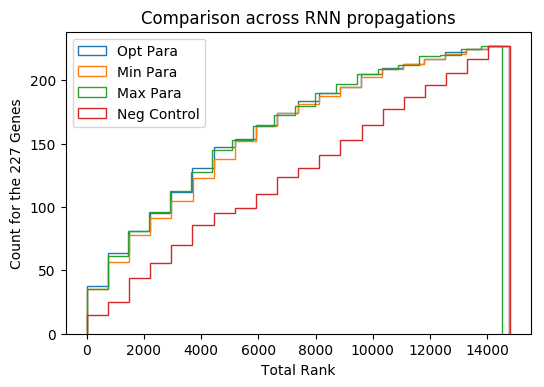

In [132]:
x  = raw_ranking
# the histogram of the data
n, bins, patches = plt.hist(x1, 20, histtype='step', cumulative=True, density=False)
n, bins, patches = plt.hist(x2, 20, histtype='step', cumulative=True, density=False)
n, bins, patches = plt.hist(x3, 20, histtype='step', cumulative=True, density=False)
n, bins, patches = plt.hist(x4, 20, histtype='step', cumulative=True, density=False)
plt.ylabel('Count for the 227 Genes')
plt.title('Comparison across RNN propagations')
plt.xlabel('Total Rank')
plt.legend(['Opt Para', 'Min Para', 'Max Para', 'Neg Control'],loc='upper left')
plt.show()


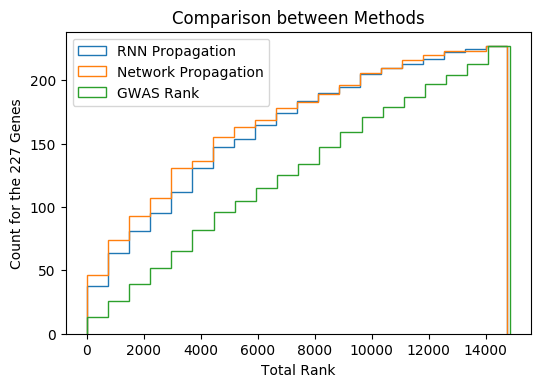

In [131]:
x  = raw_ranking
# the histogram of the data
n, bins, patches = plt.hist(x1, 20, histtype='step', cumulative=True, density=False)
n, bins, patches = plt.hist(network_ranking, 20, histtype='step', cumulative=True, density=False)
n, bins, patches = plt.hist(raw_ranking, 20, histtype='step', cumulative=True, density=False)

plt.ylabel('Count for the 227 Genes')
plt.title('Comparison between Methods')
plt.xlabel('Total Rank')
plt.legend(['RNN Propagation', 'Network Propagation', 'GWAS Rank'],loc='upper left')
plt.show()


['UBC', 'APP', 'PRKACB', 'PRKACG', 'PRKACA', 'HNF4A', 'HIST1H2BN', 'TAF1', 'ARRB1', 'HIST1H2BD', 'GNB1', 'HIST1H4K', 'MYC', 'JUN', 'HIST1H4L', 'HIST1H1B', 'HIST1H2AK', 'HIST1H3I', 'SLC17A1', 'HIST1H2AL', 'PGBD1', 'HIST1H1E', 'TCF4', 'CHEK1', 'OR2B2', 'ZKSCAN4', 'GNG13', 'GRK2', 'ZSCAN12', 'EP300', 'ZNF184', 'ELAVL1', 'SP1', 'SLC17A3', 'ZNF165', 'HIST1H4C', 'PIK3C2A', 'HIST1H2BC', 'ZKSCAN3', 'NT5C2', 'ESR1', 'NKAPL', 'HIST1H2BL', 'MAPK1', 'GNGT1', 'PLCB2', 'REEP1', 'MAD1L1', 'HIST1H4J', 'HIST1H2AC', 'TP53', 'ARRB2', 'EI24', 'HIST1H2AJ', 'EGFR', 'CNNM2', 'HIST1H3C', 'ZSCAN23', 'SRPK2', 'HIST1H3H', 'GNAO1', 'LYN', 'NTRK3', 'HIST1H2BM', 'GNAL', 'HIST1H2BJ', 'SCGN', 'HFE', 'STT3A', 'GNG7', 'DPYD', 'HSP90AB1', 'SLC17A4', 'ITIH4', 'HSPA8', 'CDC5L', 'RTP2', 'RTP1', 'BTN3A2', 'CYP2C9', 'AS3MT', 'BTN2A1', 'UBA52', 'NUDT1', 'HIST1H1T', 'HIST1H4B', 'AK3', 'GRM3', 'HSPA5', 'BTN2A2', 'HIST1H1C', 'XPO1', 'SRF', 'SMARCA5', 'ITIH1', 'GPX5', 'PATE1', 'ITIH3', 'HIST1H2AG', 'PKNOX2', 'DNAJA3', 'UBE2D2', '

/Users/apple/anaconda3/lib/python3.5/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


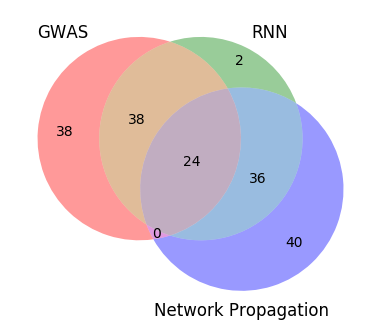

In [130]:
venn3([set(raw_name[:100]), set(name1[:100]), set(name_np[:100])], ('GWAS', 'RNN', 'Network Propagation'))

# name_np[:100]
print(name1[:1000])

#### Manhattan Plot Data Overview

In [123]:

# down vote
# accepted
# You can use something like this:

from pandas import DataFrame
from scipy.stats import uniform
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt

# some sample data
# df = DataFrame({'gene' : ['gene-%i' % i for i in np.arange(10000)],
# 'pvalue' : uniform.rvs(size=10000),
# 'chromosome' : ['ch-%i' % i for i in randint.rvs(0,12,size=10000)]})
df=_table
np_dict= dict(network_rank_sorted)
rank_list=load_json(r"/Users/apple/PycharmProjects/BNFO286_Project/raw_output_data_max_parameters.json")
len(np_dict)
NP_p = []
RNN_p = []
rnn_dict = dict(zip(network_gane_name_list, load_json(r"/Users/apple/PycharmProjects/BNFO286_Project/raw_output_control.json")
))
for i in _table.Gene:
    if i not in np_dict.keys():
        NP_p.append(0)
        RNN_p.append(0)
    else:
        NP_p.append(np_dict[i]/2.3025850929940459)
        RNN_p.append(rnn_dict[i]/2.3025850929940459)
df['np p_value'] = NP_p
df['rnn Weight'] = RNN_p
# # -log_10(pvalue)
df['-log10 pvalue'] = -np.log10(df['TopSNP P-Value'])
df.Chr = df.Chr.astype('category')
df.Chr = df.Chr.cat.set_categories(list(set(_table.Chr)), ordered=True)
df = df.sort_values(['Chr', 'Gene Start'], ascending=[True, True])
# # df
# # How to plot gene vs. -log10(pvalue) and colour it by chromosome?
df['Chromosome'] = range(len(df))
df_grouped = df.groupby(('Chr'))

df.head()
# df=pd.read_csv(r"/Users/apple/PycharmProjects/BNFO286_Project/data_table.json")
# df.head()

,Unnamed: 0,Gene,Chr,Gene Start,Gene End,nSNPs,TopSNP,TopSNP Pos,TopSNP P-Value,SNP Distance,-log10 pvalue,Chromosome,np p_value,rnn Weight
11793,11804,SAMD11,1,861014,869824,12,rs1110052,863421.0,0.170554,2407.0,0.768138,0,0.503399,0.145708
9135,8836,NOC2L,1,883513,884542,9,rs28415373,883844.0,0.087387,331.0,1.058556,1,1.752342,0.194094
9136,6915,KLHL17,1,887323,890958,7,rs28415373,883844.0,0.087387,3479.0,1.058556,2,0.576398,0.184054
9137,10245,PLEKHN1,1,891739,900347,9,rs28415373,883844.0,0.087387,7895.0,1.058556,3,0.641790,0.335781
7493,5804,HES4,1,924206,925333,8,rs1891910,922320.0,0.057122,1886.0,1.243195,4,0.883359,0.452566


Text(0.5,1,'Manhattan Plot for RNN Weight')

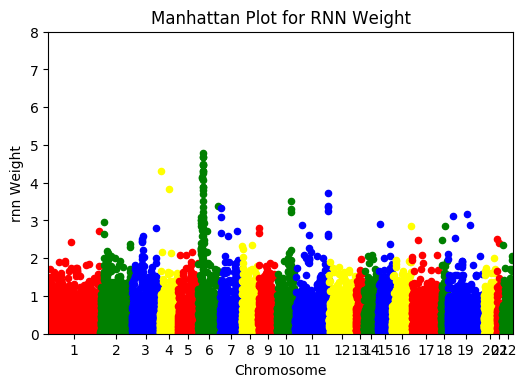

In [129]:
fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['red','green','blue', 'yellow']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
#     print(group.head())
    group.plot(kind='scatter', x='Chromosome', y='rnn Weight',color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['Chromosome'].iloc[-1] - (group['Chromosome'].iloc[-1] - group['Chromosome'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)
ax.set_xlim([0, len(df)])
ax.set_ylim([0,8])
# ax.set_ylim([0,16])
plt.title('Manhattan Plot for RNN Weight')

Text(0.5,1,'Manhattan Plot for Network Propagation')

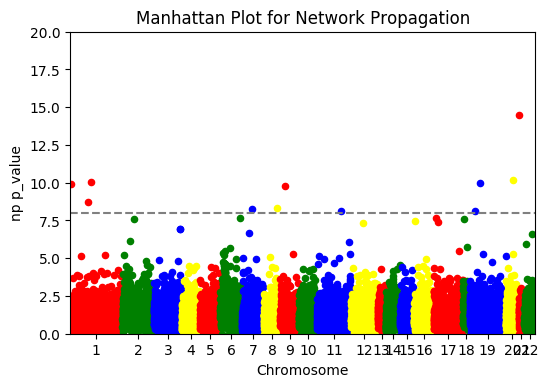

In [127]:
fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['red','green','blue', 'yellow']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='Chromosome', y='np p_value',color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['Chromosome'].iloc[-1] - (group['Chromosome'].iloc[-1] - group['Chromosome'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)
ax.set_xlim([0, len(df)])
ax.set_ylim([0,20])
# ax.set_ylim([0,16])
plt.axhline(y=8, color='grey', linestyle='--')
plt.title('Manhattan Plot for Network Propagation')


Text(0.5,1,'Manhattan Plot for GWAS')

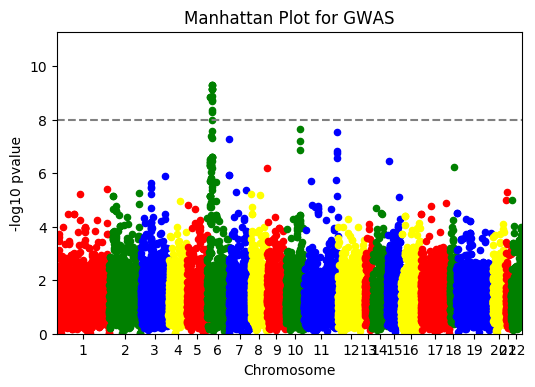

In [126]:
fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['red','green','blue', 'yellow']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='Chromosome', y='-log10 pvalue',color=colors[num % len(colors)], ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['Chromosome'].iloc[-1] - (group['Chromosome'].iloc[-1] - group['Chromosome'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)
ax.set_xlim([0, len(df)])
ax.set_ylim([0,max(df['-log10 pvalue'])+2])
# ax.set_ylim([0,16])
plt.axhline(y=8, color='grey', linestyle='--')

plt.title('Manhattan Plot for GWAS')


In [275]:
print(_table[_table['-log10 pvalue']>8].Gene)
print(_table[_table['npp']>6].Gene)
print(_table[_table['rnnp']>4].Gene)

0      HIST1H4K
1     HIST1H2AK
2     HIST1H2BN
3     HIST1H2AL
4      HIST1H1B
5      HIST1H3I
6      HIST1H4L
7         PGBD1
8      HIST1H1E
9     HIST1H2BD
10      ZKSCAN4
11      ZSCAN12
12       ZNF165
13        NKAPL
Name: Gene, dtype: object
82          APP
531       EP300
743       ARRB1
2985     PRKACG
3826      REEP1
4205      GNG13
5184       ESR1
5326     ELAVL1
5699        MYC
6207        JUN
6543       RTP1
6582       EGFR
6849       RTP2
8117       GNAL
8835      HSPA8
8876       TP53
8965      GNGT1
9242     PRKACB
10208       SP1
10578      XPO1
10863    PRKACA
11937       UBC
12329      GNB1
13568     HNF4A
14177     ARRB2
Name: Gene, dtype: object
0         HIST1H4K
1        HIST1H2AK
2        HIST1H2BN
3        HIST1H2AL
4         HIST1H1B
5         HIST1H3I
6         HIST1H4L
7            PGBD1
8         HIST1H1E
9        HIST1H2BD
10         ZKSCAN4
11         ZSCAN12
12          ZNF165
13           NKAPL
14           OR2B2
15           NT5C2
18          ZNF184
1

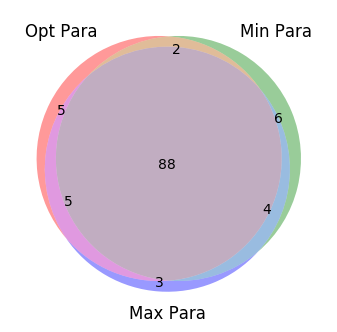

In [133]:
name_list
venn3([set(name1[:100]), set(name2[:100]), set(name3[:100])], ('Opt Para', 'Min Para', 'Max Para'))
# set(_table[_table['rnnp']>3])